In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

Задание 1
Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
class GradientBoosting():
    def __init__(self, n_trees, min_leaf, max_depth, criteria, coefs, eta, tree_type=0):
        self.n_trees = n_trees
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.criteria = criteria
        self.coefs = coefs
        self.eta = eta
        self.tree_type=tree_type
        
        self.trees = []
        self.train_errors = []
        self.test_errors = []

        
    def fit(self, X_train, X_test, y_train, y_test):        
        for i in range(n_trees):
            if self.tree_type == 0:
                tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            else:
                tree = Tree(n_features=4, min_leaf=self.min_leaf, max_depth=self.max_depth, criteria=self.criteria)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
                self.trees.append(tree)
                
                self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
            else:
                # Получим ответы на текущей композиции                
                target = self.predict(X_train)
                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_train, y_train - target)
                
                self.trees.append(tree)
                
                self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
       
       
    def predict(self, X):        
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
               
        prediction = []
        for x in X:
            prediction_x = 0           
            for alg, coef in zip(self.trees, self.coefs):
                prediction_x += self.eta * coef * alg.predict([x])[0]
            prediction.append(prediction_x)           
            
        return np.array(prediction).flatten()     

        
    def mse(self, y, y_pred):
        return np.mean((y - y_pred)**2)

In [3]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Зависимость ошибки от количества деревьев в ансамбле

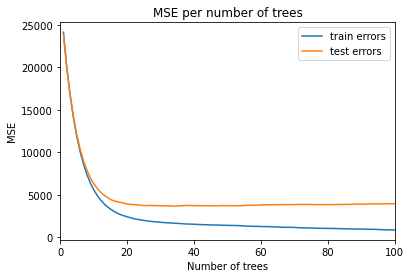

In [4]:
n_trees = 100
min_leaf = 1
max_depth = 3
criteria='gini'
coefs = [1] * n_trees
eta = 0.1

model_gb = GradientBoosting(n_trees, min_leaf, max_depth, criteria, coefs, eta)
model_gb.fit(X_train, X_test, y_train, y_test)

train_errors_gb = model_gb.train_errors
test_errors_gb = model_gb.test_errors

x = list(range(1, n_trees+1))

plt.xlim(0, n_trees)
plt.plot(x, train_errors_gb, label='train errors')
plt.plot(x, test_errors_gb, label='test errors')
plt.title('MSE per number of trees')
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

In [5]:
test_errors_gb[-1]

3940.0835038138825

Зависимость ошибки от максимальной глубины деревьев в ансамбле

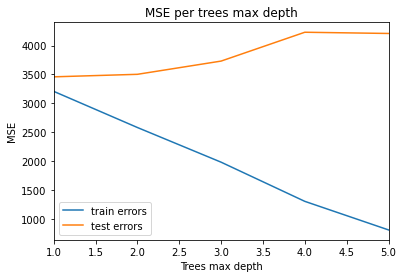

In [6]:
n_trees = 25
tree_max_depth = 5

train_errors = []
test_errors = []
for i in range(1, tree_max_depth+1):
    max_depth = i
    
    model_gb = GradientBoosting(n_trees, min_leaf, max_depth, criteria, coefs, eta)
    model_gb.fit(X_train, X_test, y_train, y_test)

    train_err = model_gb.train_errors[-1]
    test_err = model_gb.test_errors[-1]
    
    train_errors.append(train_err)
    test_errors.append(test_err)

x = list(range(1, tree_max_depth+1))

plt.xlim(1, tree_max_depth)
plt.plot(x, train_errors, label='train errors')
plt.plot(x, test_errors, label='test errors')
plt.title('MSE per trees max depth')
plt.xlabel('Trees max depth')
plt.ylabel('MSE')
plt.legend(loc='lower left')
plt.show()

Выводы: 
С увелиением числв деревьев в ансамбле ошибка на тестовой выборке падает до определенного уровня, а потом стабилизируется, ошибка на обучающей выборке продолжает падать. Увеличивать число деревев в ансамбле после достижения этого уровня нецелесообразно.
С увеличением максимальной глубины деревьев в ансамбле c уровня выше 2 ошибка начинает заметно расти из-за переобучения модели. При этом на обучающей выборке с увеличением максимальной глубины деревьев в ансамбле ошибка снижается.